In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

05/11/2020 21:10:28 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/11/2020 21:10:38 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/11/2020 21:10:47 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/11/2020 21:10:57 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/11/2020 21:11:07 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

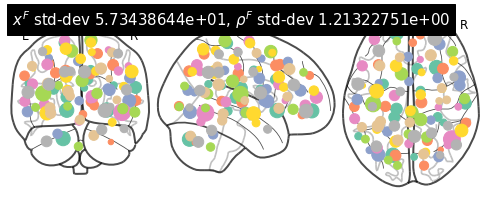

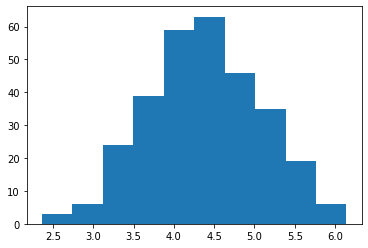

(<nilearn.plotting.displays.OrthoProjector at 0x7f82a7c74410>,
 tensor([[-54.2423, -54.2502,  23.0834],
         [ 27.9412,  17.9947,  -4.6768],
         [ 35.3159, -39.8728,  21.3294],
         [-16.6531, -34.4198,  66.0848],
         [  7.6394,  16.6608,  27.9382],
         [-17.9652, -74.1866, -34.7809],
         [-14.1375,  54.5173,  -4.9760],
         [  4.2925, -76.0375,  18.6452],
         [-27.8785,   0.6906,  17.0157],
         [ 58.2894, -19.5507,  19.0226],
         [-14.1875, -25.5752,   8.8857],
         [ 29.1700, -33.9601,  -5.1432],
         [ 11.0916,  -6.4283,  37.5053],
         [-33.1463,  21.0382,  43.9047],
         [ 18.2294, -58.8142,  54.6768],
         [ 32.3086, -68.5434, -38.3683],
         [ 10.8784,  52.2067,  32.2649],
         [ 14.8002, -85.2278,   0.0954],
         [  2.8885,  44.0949,  -9.3029],
         [-15.2491, -74.5177,  36.7442],
         [ 34.6450,  16.8462,  42.7495],
         [ 58.8371, -40.2433,   5.3327],
         [ 11.9870, -18.6616,   4.3

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

05/11/2020 21:22:24 [Epoch 1] (25117ms) Posterior free-energy 2.26010189e+09 = KL from prior 1.63895125e+06 - log-likelihood -2.25846323e+09
05/11/2020 21:22:24 Saving checkpoint...
05/11/2020 21:22:49 [Epoch 2] (25115ms) Posterior free-energy 2.20356890e+09 = KL from prior 1.50314938e+06 - log-likelihood -2.20206618e+09
05/11/2020 21:23:14 [Epoch 3] (24253ms) Posterior free-energy 2.15831578e+09 = KL from prior 1.37804800e+06 - log-likelihood -2.15693773e+09
05/11/2020 21:23:38 [Epoch 4] (24302ms) Posterior free-energy 2.12475712e+09 = KL from prior 1.26997375e+06 - log-likelihood -2.12348710e+09
05/11/2020 21:24:02 [Epoch 5] (24291ms) Posterior free-energy 2.10070707e+09 = KL from prior 1.18577738e+06 - log-likelihood -2.09952141e+09
05/11/2020 21:24:27 [Epoch 6] (24321ms) Posterior free-energy 2.08219366e+09 = KL from prior 1.10209512e+06 - log-likelihood -2.08109133e+09
05/11/2020 21:24:51 [Epoch 7] (24354ms) Posterior free-energy 2.06895859e+09 = KL from prior 1.02928162e+06 - log

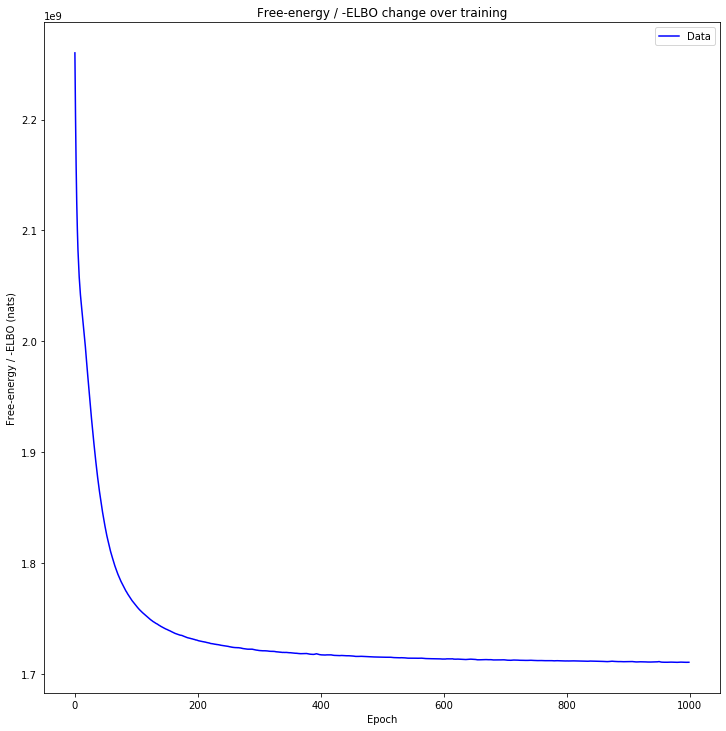

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


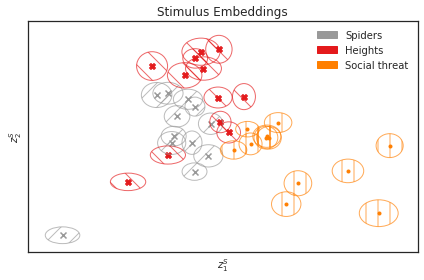

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


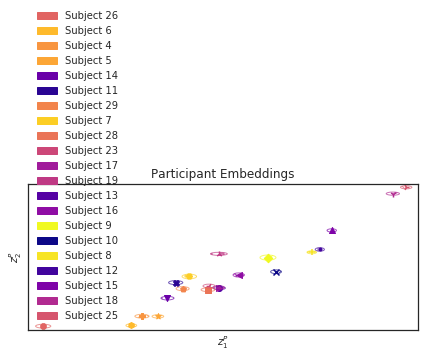

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

05/12/2020 04:09:25 Plotting factors for Participant 4, run 2


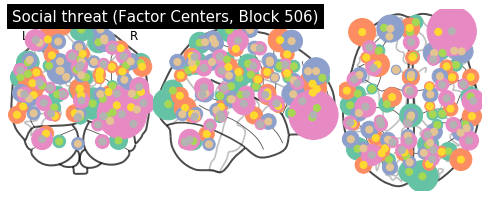

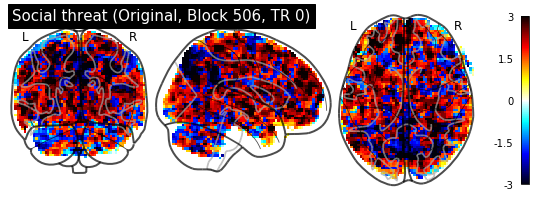

05/12/2020 04:09:29 Reconstruction Error (Frobenius Norm): 1.74104416e+02 out of 1.33394958e+03


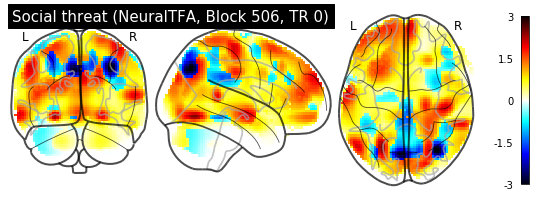

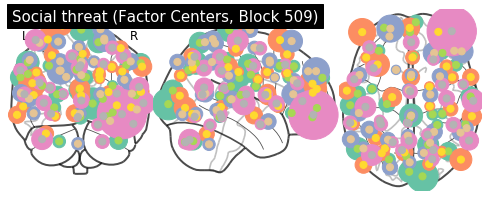

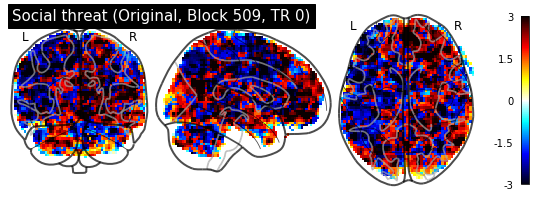

05/12/2020 04:09:34 Reconstruction Error (Frobenius Norm): 1.73332001e+02 out of 1.50854736e+03


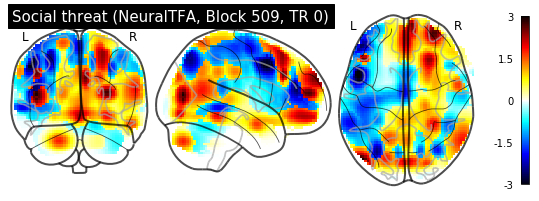

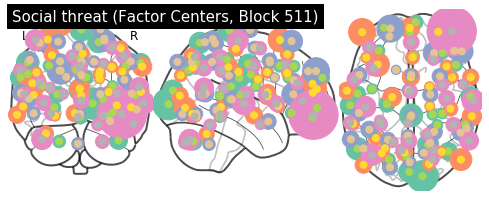

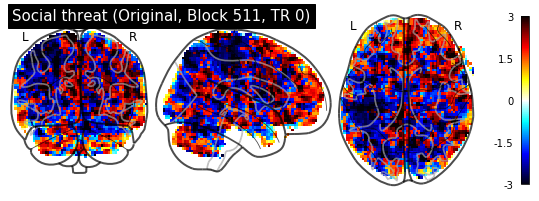

05/12/2020 04:09:38 Reconstruction Error (Frobenius Norm): 1.90677200e+02 out of 1.57811975e+03


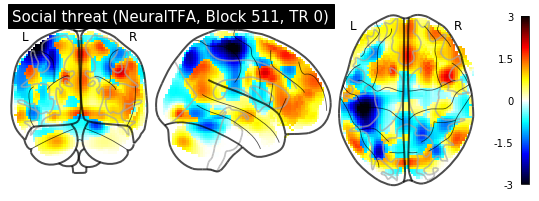

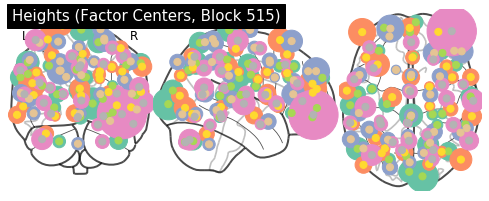

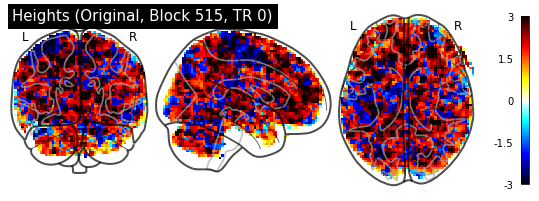

05/12/2020 04:09:43 Reconstruction Error (Frobenius Norm): 2.01229721e+02 out of 1.51569971e+03


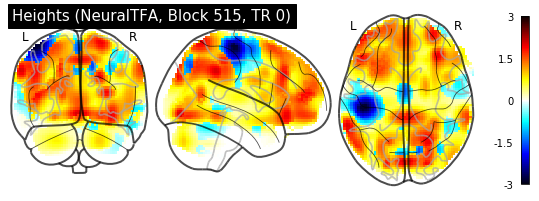

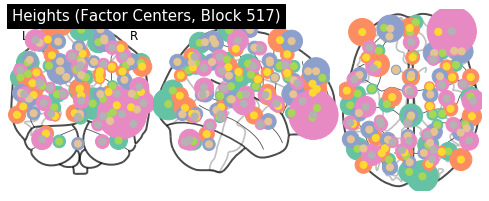

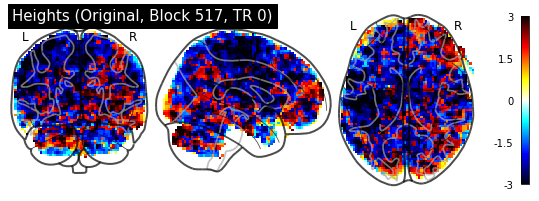

05/12/2020 04:09:48 Reconstruction Error (Frobenius Norm): 1.60791870e+02 out of 1.40851575e+03


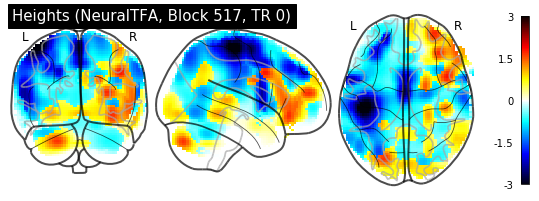

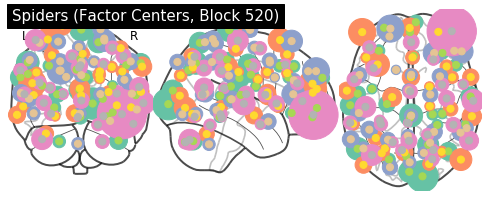

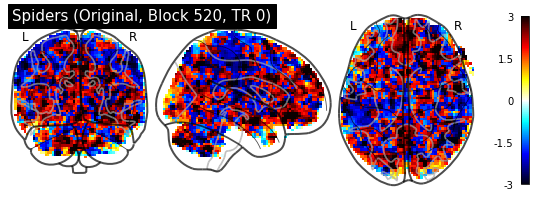

05/12/2020 04:09:52 Reconstruction Error (Frobenius Norm): 1.92535553e+02 out of 1.42747473e+03


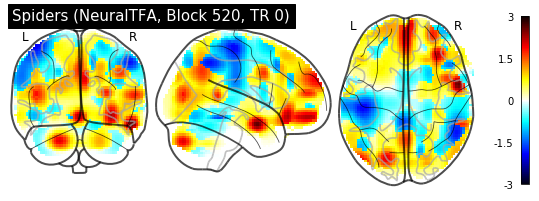

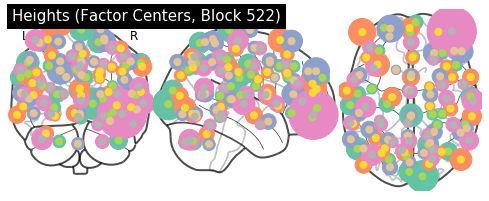

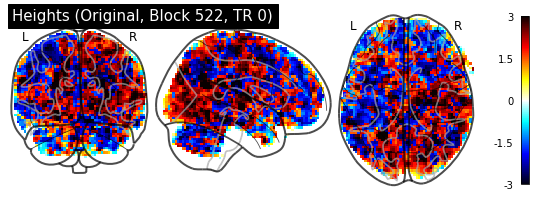

05/12/2020 04:09:57 Reconstruction Error (Frobenius Norm): 1.34489517e+02 out of 1.31424573e+03


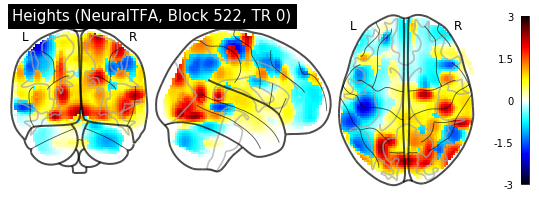

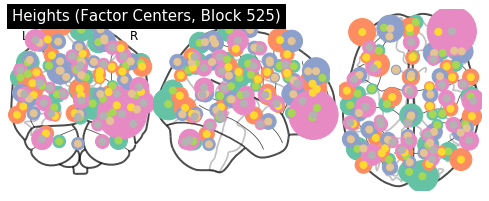

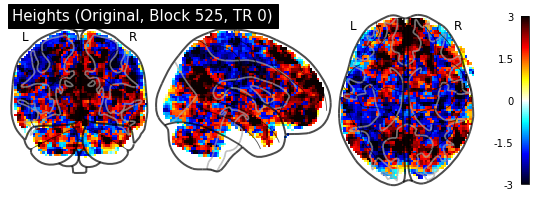

05/12/2020 04:10:02 Reconstruction Error (Frobenius Norm): 1.83189316e+02 out of 1.36300964e+03


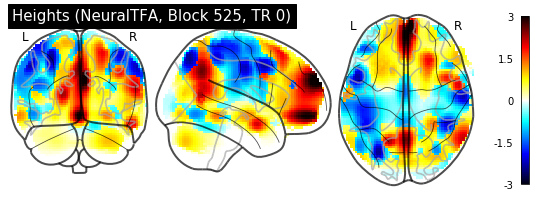

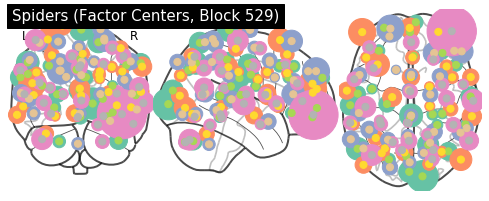

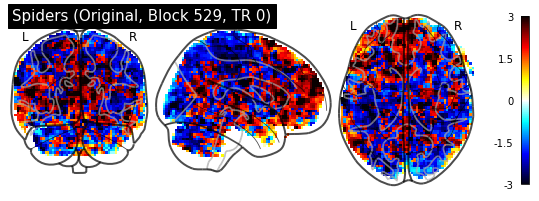

05/12/2020 04:10:06 Reconstruction Error (Frobenius Norm): 1.83396744e+02 out of 1.51311108e+03


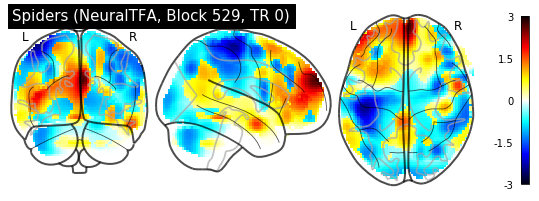

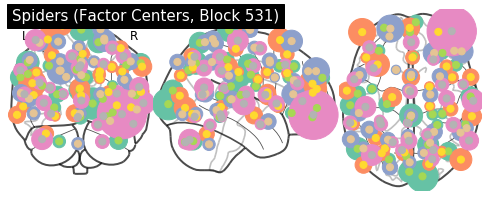

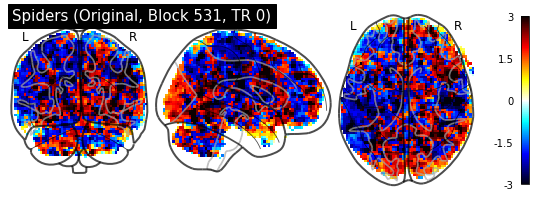

05/12/2020 04:10:11 Reconstruction Error (Frobenius Norm): 1.58026535e+02 out of 1.48488599e+03


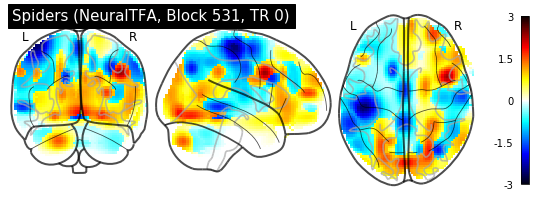

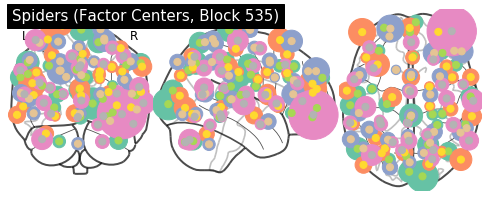

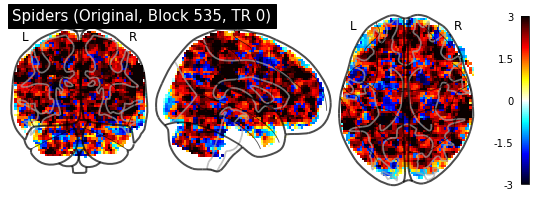

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/12/2020 04:10:16 Reconstruction Error (Frobenius Norm): 1.82744980e+02 out of 1.51273621e+03


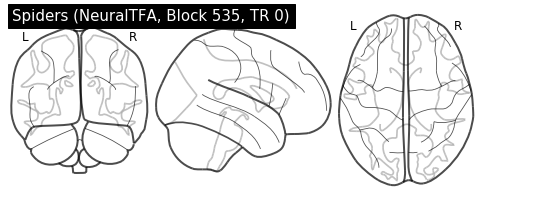

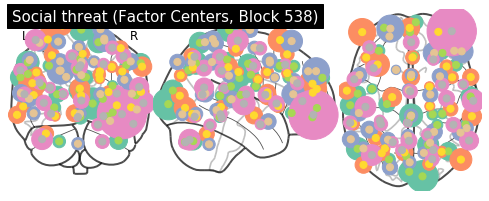

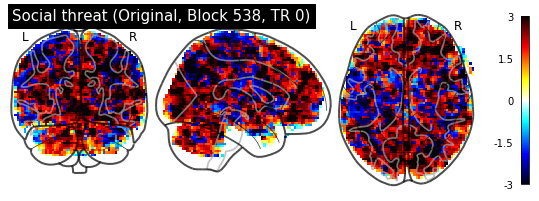

05/12/2020 04:10:20 Reconstruction Error (Frobenius Norm): 1.76840271e+02 out of 1.57209790e+03


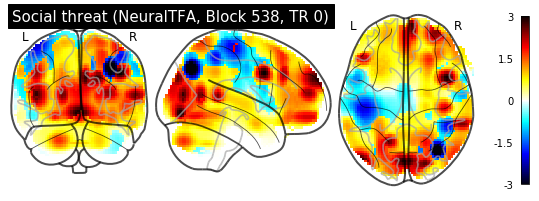

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)


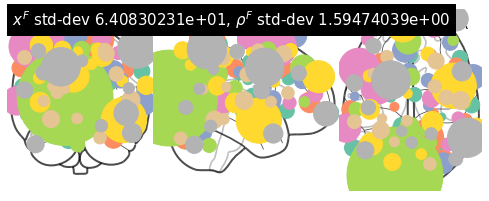

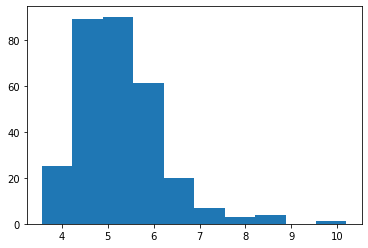

(<nilearn.plotting.displays.OrthoProjector at 0x7f7fee02ce90>,
 tensor([[-59.8846, -66.4074,  19.3951],
         [ 52.5472,  28.0122,  -4.8888],
         [ 33.5828, -33.9944,  21.0005],
         [ -8.0026, -44.0733,  65.0371],
         [  1.2042,  30.0588,  29.1816],
         [-12.1290, -77.1585, -36.0605],
         [-35.3844,  71.1246,  -7.6918],
         [ -1.1854, -90.0454,  14.4857],
         [-34.7863,  -7.9363,  11.3988],
         [ 64.8749, -21.3373,  36.0327],
         [-20.4619, -12.6252,  28.3598],
         [ 27.0513, -62.4506, -13.1640],
         [  4.8569, -10.4820,  46.8060],
         [-30.2847,  24.8544,  40.8658],
         [ 16.7191, -55.5848,  69.7585],
         [ 34.9914, -79.0616, -34.6648],
         [ 21.0190,  59.9921,  32.8749],
         [  5.5118, -80.8811,  -2.0709],
         [ -2.9392,  52.2354,   3.9231],
         [ -7.5501, -72.5997,  38.8913],
         [ 48.4735,  20.3586,  37.1382],
         [ 58.1970, -37.8183,   0.2083],
         [ 24.8602, -29.8609,   8.2

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

05/12/2020 04:11:14 Average reconstruction error (MSE): 9.52494795e-01
05/12/2020 04:11:14 Average data norm (Euclidean): 1.09839495e+00
05/12/2020 04:11:14 Percent average reconstruction error: 0.305700


(0.9524947953800414, 1.0983949463766804, 0.0030570022102158648)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

05/12/2020 04:12:03 Average reconstruction error (MSE): 1.22491548e+03 +/- 5.51408982e+01
05/12/2020 04:12:03 Average data norm (Euclidean): 1.41168146e+03 +/- 8.14817628e+01
05/12/2020 04:12:03 Percent average reconstruction error: 86.905953 +/- 3.71636930e+00


(array([1247.84912109, 1175.32714844, 1270.88049316, 1259.49621582,
        1223.26538086, 1280.61364746, 1174.39904785, 1261.28234863,
        1228.08691406, 1207.0904541 , 1266.42504883, 1288.38305664,
        1182.02233887, 1236.7052002 , 1255.09130859, 1200.03845215,
        1237.55737305, 1233.26794434, 1238.45336914, 1240.06799316,
        1239.4152832 , 1245.55090332, 1230.25793457, 1239.55151367,
        1232.36462402, 1295.73962402, 1188.14379883, 1297.36254883,
        1288.44335938, 1276.04638672, 1254.80432129, 1227.51916504,
        1202.70556641, 1205.9654541 , 1208.63659668, 1240.38964844,
        1196.88317871, 1241.13500977, 1213.30078125, 1162.05163574,
        1226.33789062, 1335.48181152, 1224.01464844, 1448.98046875,
        1217.85180664, 1315.64038086, 1388.72131348, 1217.29309082,
        1200.66906738, 1146.06860352, 1218.13586426, 1246.52368164,
        1225.58532715, 1332.65649414, 1213.88134766, 1281.51538086,
        1235.38208008, 1184.51745605, 1207.83569

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


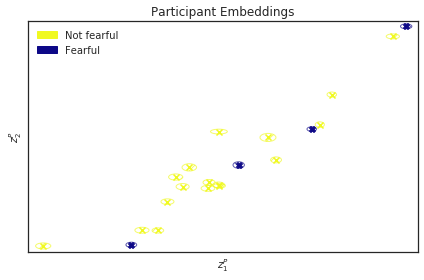

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


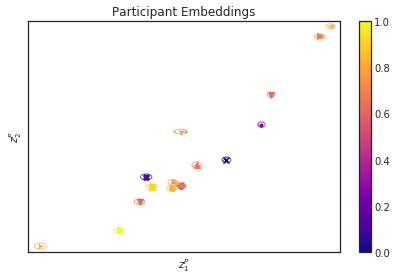

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


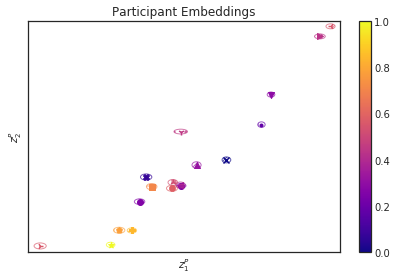

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


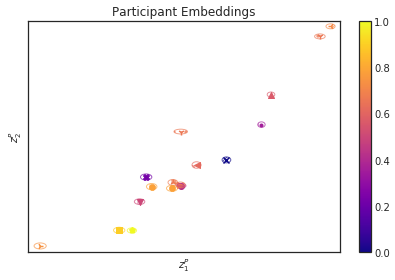

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


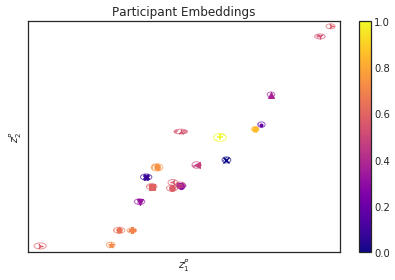

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')